In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from munc13 import Munc13, Solver

In [2]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
# this is used to create the model for analysis and plotting without running the GA
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.001, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 1000}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.1, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 100},   # krc
        "kfxx":      {"min": 0.01, "max": 10},   # kx2 uM-1s-1
        "krxx":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":       {"min": 1,   "max": 100}, # sig, scale factor >1
        "eDF":      {"min": 0.001,   "max": 1}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 10},   # S0 (uM)
        "R0":        {"min": 1, "max": 1000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.1,   "max": 100}, # X0  (/um^2)
         
}

# Order in which the solver will read parameters from a candidate
params_to_optimize = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfxx","krxx","eLoop","eDF","kfdd","stimUpSR","S0","R0","X0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize, t_max=maxTime)

Gamma is 333.3333333333333


# use a specific parameter set and look at the solution.

[0.68775976 0.67678315 0.66655994 ... 0.48150073 0.48150073 0.48150073]
Cluster density chi: Simulated 0.029174376864893943, Experimental 0.024375, Chi -0.1938431519581682
Small cluster density chi: Simulated 0.008761108848813447, high density 0.029174376864893943, Chi -0.058436711623240524
Percent of mem munc13 in clusters: 0.042292624571044574%. Percent munc13 on the membrane: 29.989982074286164%. Monomer mem: 21.6564992905473%. Dimer mem: 39.14463694110765%
Change in density over last 25%: 0.002057459828888074, associated chi: -0.19000241407125487
Cluster density chi: Simulated 0.033088621873350384, Experimental 0.04125, Chi -0.19572626020541362
Small cluster density chi: Simulated 0.003869460792140533, high density 0.033088621873350384, Chi -0.005605986048054949
Percent of mem munc13 in clusters: 0.04745090978539301%. Percent munc13 on the membrane: 30.316104144929625%. Monomer mem: 21.553891456248383%. Dimer mem: 39.19623252771895%
Change in density over last 25%: 0.00061634667505

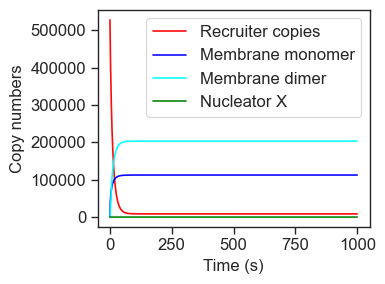

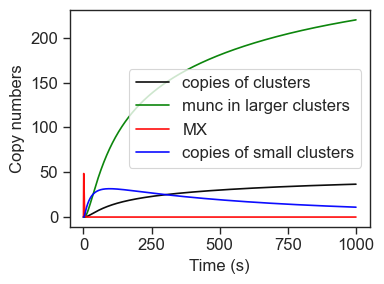

<Figure size 640x480 with 0 Axes>

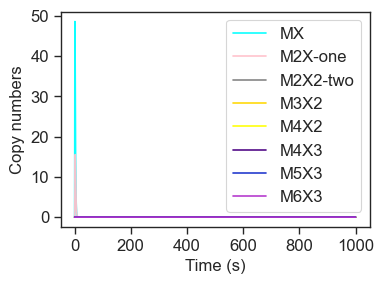

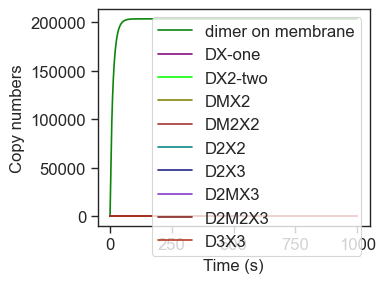

In [6]:
low1 = [0.49335715569731065, 1.347543094580936, 0.001, 47.12925771187148, 0.018594310247031155, 0.01603485903182298, 7.038960289433359, 0.02886043244602297, 6.948907555262286, 4.7041029781798676, 12.54929757390953, 0.554932576424846, 0.05905615952760187, 4.6039748546372445, 0.011467935727766825, 716.4098928992836, 0.1447290585619685]
low1=[0.157793987088382, 0.005735011169217226, 0.19915412393565862, 1.6405340780468105, 0.44545068953623623, 2.742639756834301, 0.14476212777582723, 2.0820928874892366, 0.6511769339465802, 151.27627030149714, 0.0014882370056972418, 0.0037596162931540908, 0.06118387651552151, 3.019325668201894, 0.6877597553190984, 420.6589798363307, 0.1122205524709933]
test_candidate=low1
sol=model.simulate_pre(test_candidate)
print(sol[0])

fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)

model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

[0.48150073 0.48125657 0.48103909 ... 0.47925779 0.47925779 0.47925779]
Cluster density chi: Simulated 0.029174376864893943, Experimental 0.024375, Chi -0.1938431519581682
Small cluster density chi: Simulated 0.008761108848813447, high density 0.029174376864893943, Chi -0.058436711623240524
Percent of mem munc13 in clusters: 0.042292624571044574%. Percent munc13 on the membrane: 29.989982074286164%. Monomer mem: 21.6564992905473%. Dimer mem: 39.14463694110765%
Change in density over last 25%: 0.002057459828888074, associated chi: -0.19000241407125487
Cluster density chi: Simulated 0.033088621873350384, Experimental 0.04125, Chi -0.19572626020541362
Small cluster density chi: Simulated 0.003869460792140533, high density 0.033088621873350384, Chi -0.005605986048054949
Percent of mem munc13 in clusters: 0.04745090978539301%. Percent munc13 on the membrane: 30.316104144929625%. Monomer mem: 21.553891456248383%. Dimer mem: 39.19623252771895%
Change in density over last 25%: 0.00061634667505

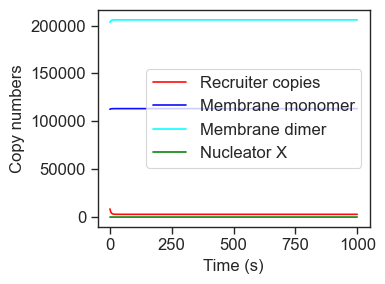

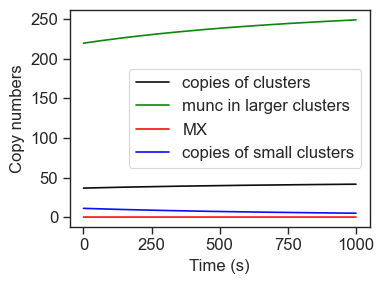

<Figure size 640x480 with 0 Axes>

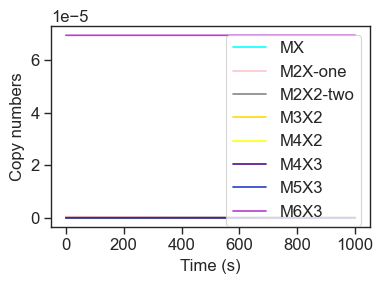

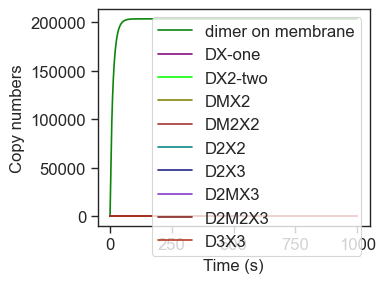

In [7]:
solPost=model.simulate_post(test_candidate, sol)
print(solPost[0])
fit = model.eval_both_clusterModel(test_candidate)
print("fitness of this candidate: ", fit)
print(model.timePoints[-1])
model.test_mass_conservation(solPost)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)

#### We select the solution #3 in the following results (the last cell can be used to save all results of one solution in a single figure to pick nice solutions)

##### WT
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### DC2A
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### shRNA RIM2
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### DC2B
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### Endogenous level
experiment observe much slower mobility, and still a slow-down following stimulation

Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

#### Save all results of one solution in a single figure to pick nice solutions

In [ ]:
model.plot_diffusivity_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Plot the ranges of parameters in the best 10% solutions

In [ ]:
model.plot_parameter_ranges_summary(percent=10)

In [ ]:
model.plot_parms(percent=10)

In [ ]:
model.plot_all_diffusion()

In [ ]:
model.plot_cluster_kinetic(select=3, figsize=(6, 4), fontsize=12, dpi=300)

In [ ]:
# save all results of one solution in a single figure
# model.save_individual_solution_figures_combined(best=300)